# Coursera Dataset EDA

* [Course Reviews on Coursera](https://www.kaggle.com/datasets/imuhammad/course-reviews-on-coursera)
* [Coursera Courses 2021](https://www.kaggle.com/datasets/khusheekapoor/coursera-courses-dataset-2021)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

In [102]:
df_courses = pd.read_csv('../data/Coursera_courses.csv').drop_duplicates()
df_coursedata = pd.read_csv('../data/Coursera.csv').drop_duplicates()

---

## Checking if the 2 are joinable

(This section is skippable)

In [2]:
print(df_courses.shape)
df_courses.head()

(623, 4)


,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


In [4]:
print(df_coursedata.shape)
df_coursedata.head()

(3522, 7)


,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


In [6]:
df_courses.merge(
    df_coursedata,
    left_on='course_url',
    right_on='Course URL',
    how='inner'
).shape

(540, 11)

See if the other 83 courses are salvageable

In [20]:
df_extra = df_courses[~df_courses['course_url'].isin(df_coursedata['Course URL'])]
print(df_extra.shape)

df_extra[['name', 'institution', 'course_url']].head(10)

(141, 4)


,name,institution,course_url
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada
4,Become a CBRS Certified Professional Installer by Google,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi-training
16,Project Launch,"University of California, Irvine",https://www.coursera.org/learn/project-management
18,Writing in the Sciences,Stanford University,https://www.coursera.org/learn/sciwrite
19,Stanford Introduction to Food and Health,Stanford University,https://www.coursera.org/learn/food-and-health
26,Viral Marketing and How to Craft Contagious Content,University of Pennsylvania,https://www.coursera.org/learn/wharton-contagious-viral-marketing
38,Primeros Auxilios Psicológicos (PAP),Universitat Autònoma de Barcelona,https://www.coursera.org/learn/pap
41,Computational Thinking for Problem Solving,University of Pennsylvania,https://www.coursera.org/learn/computational-thinking-problem-solving
45,Introduction to Marketing,University of Pennsylvania,https://www.coursera.org/learn/wharton-marketing


In [27]:
# df_coursedata[df_coursedata['Course URL'].str.contains('machine')]
# df_coursedata[df_coursedata['University'].str.contains('Pennsylvania')]

df_coursedata['Course ID'] = df_coursedata['Course URL'].str.split('/').str[-1]

In [31]:
df_courses.merge(
    df_coursedata,
    left_on='course_id',
    right_on='Course ID',
    how='inner'
).shape

(540, 12)

Not only are they not salvageable, there are even some duplicates..

In [42]:
dupe_ids = df_coursedata.groupby('Course ID')[['Course URL']].count()
dupe_ids = dupe_ids[dupe_ids['Course URL'] > 1].index

shared_dupes = [x for x in dupe_ids if x in df_courses['course_id'].values][:10]

df_coursedata[df_coursedata['Course ID'].isin(shared_dupes)].sort_values(by='Course ID').head(10)

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills,Course ID
3491,Applied Data Science Capstone,IBM,Beginner,4.6,https://www.coursera.org/learn/applied-data-science-capstone,"This capstone project course will give you a taste of what data scientists go through in real life when working with data. You will learn about location data and different location data providers, such as Foursquare. You will learn how to make RESTful API calls to the Foursquare API to retrieve data about venues in different neighborhoods around the world. You will also learn how to be creative in situations where data are not readily available by scraping web data and parsing HTML code. You will utilize Python and its pandas library to manipulate data, which will help you refine your skills for exploring and analyzing data. Finally, you will be required to use the Folium library to great maps of geospatial data and to communicate your results and findings. If you choose to take this course and earn the Coursera course certificate, you will also earn an IBM digital badge upon successful completion of the course. LIMITED TIME OFFER: Subscription is only $39 USD per month for...",Algorithms data clustering algorithms web analysis Python Programming cluster analysis Computer Programming Data Analysis Data Visualization Machine Learning data-science data-analysis,applied-data-science-capstone
3490,Applied Data Science Capstone,IBM,Beginner,4.6,https://www.coursera.org/learn/applied-data-science-capstone,"This capstone project course will give you a taste of what data scientists go through in real life when working with data. You will learn about location data and different location data providers, such as Foursquare. You will learn how to make RESTful API calls to the Foursquare API to retrieve data about venues in different neighborhoods around the world. You will also learn how to be creative in situations where data are not readily available by scraping web data and parsing HTML code. You will utilize Python and its pandas library to manipulate data, which will help you refine your skills for exploring and analyzing data. Finally, you will be required to use the Folium library to great maps of geospatial data and to communicate your results and findings. If you choose to take this course and earn the Coursera course certificate, you will also earn an IBM digital badge upon successful completion of the course. LIMITED TIME OFFER: Subscription is only $39 USD per month for...",Algorithms data clustering algorithms web analysis Python Programming cluster analysis Computer Programming Data Analysis Data Visualization Machine Learning data-science data-analysis,applied-data-science-capstone
1385,Front-End Web UI Frameworks and Tools: Bootstrap 4,The Hong Kong University of Science and Technology,Intermediate,4.7,https://www.coursera.org/learn/bootstrap-4,"This course will give you an overview of client-side web UI frameworks, in particular Bootstrap 4. You will learn about grids and responsive design, Bootstrap CSS and JavaScript components. You will learn about CSS preprocessors, Less and Sass. You will also learn the basics of Node.js and NPM and task runners like Grunt and Gulp. At the end of this course, you will be able to a)Set up, design and style a web page using Bootstrap 4 and its components, b) Create a responsive web page design, and c) Make use of web tools to setup and manage web sites. This course also includes an honors track that enables you to work on your own project developing a website using Bootstrap 4. Students enrolling in this course should have prior good working knowledge of HTML, CSS and JavaScript.",less (stylesheet language) jquery language bootstrap (front-end framework) Javascript sass (stylesheet language) web github Software As A Service CSS computer-science mobile-and-web-development,bootstrap-4
1384,Front-End Web UI Frameworks and Tools: Bootstrap 4,The Hong Kong University of Science 

It's probably safe to drop them.

---

## Setting up the data

In [103]:
df_coursedata['Course ID'] = df_coursedata['Course URL'].str.split('/').str[-1]

df_courses_full = df_courses.merge(
    df_coursedata.drop_duplicates('Course ID', keep='first'),
    left_on='course_id',
    right_on='Course ID',
    how='inner'
)

In [104]:
df_courses_full = df_courses_full.rename(columns={
    'Difficulty Level': 'difficulty_level',
    'Course Rating': 'rating',
    'Course Description': 'description',
    'Skills': 'skills',
})

df_courses_full = df_courses_full[[
    'course_id', 'name', 'institution', 'difficulty_level', 'rating', 'description', 'skills'
]]

df_courses_full.set_index('course_id', inplace=True)

In [105]:
print(df_courses_full.shape)

df_courses_full.head(3)

(482, 6)


,name,institution,difficulty_level,rating,description,skills
course_id,,,,,,
the-science-of-well-being,The Science of Well-Being,Yale University,Intermediate,4.8,"In this course you will engage in a series of challenges designed to increase your own happiness and build more productive habits. As preparation for these tasks, Professor Laurie Santos reveals misconceptions about happiness, annoying features of the mind that lead us to think the way we do, and the research that can help us change. You will ultimately be prepared to successfully incorporate a specific wellness activity into your life. THE SCIENCE OF WELL BEING WAS PRODUCED IN PART DUE TO THE GENEROUS FUNDING OF THE DAVID F. SWENSEN FUND FOR INNOVATION IN TEACHING.",positive psychology mindfulness gratitude habit exercise savoring happiness meditation psychologies kindness personal-development personal-development
technical-support-fundamentals,Technical Support Fundamentals,Google,Conversant,4.8,"This course is the first of a series that aims to prepare you for a role as an entry-level IT Support Specialist. In this course, you�ll be introduced to the world of Information Technology, or IT. You�ll learn about the different facets of Information Technology, like computer hardware, the Internet, computer software, troubleshooting, and customer service. This course covers a wide variety of topics in IT that are designed to give you an overview of what�s to come in this certificate program. By the end of this course, you�ll be able to: ? understand how the binary system works ? assemble a computer from scratch ? choose and install an operating system on a computer ? understand what the Internet is, how it works, and the impact it has in the modern world ? learn how applications are created and how they work under the hood of a computer ? utilize common problem-solving methodologies and soft skills in an Information Technology setting",binary code internet Troubleshooting PC Hardware software technical support Networking Hardware Operating Systems Customer Support Software Installation information-technology support-and-operations
financial-markets-global,Financial Markets,Yale University,Intermediate,4.6,"An overview of the ideas, methods, and institutions that permit human society to manage risks and foster enterprise. Emphasis on financially-savvy leadership skills. Description of practices today and analysis of prospects for the future. Introduction to risk management and behavioral finance principles to understand the real-world functioning of securities, insurance, and banking industries. The ultimate goal of this course is using such industries effectively and towards a better society.",Finance Planning Leadership and Management market (economics) behavioral finance financial risk stock Risk financial markets investment business finance


In [106]:
df_reviews = pd.read_csv('../data/Coursera_reviews.csv')
df_reviews = df_reviews[df_reviews['course_id'].isin(df_courses_full.index)].drop_duplicates()
print(df_reviews.shape)
df_reviews.head()

(420493, 5)


,reviews,reviewers,date_reviews,rating,course_id
87,"This course is virtually worthless. I couldn't follow the lectures, and I have a PhD and have been a tenured professor for almost two decades. The online course is based on snippets taken from face-to-face lectures and breakout sessions, and the result is utter incoherence. The instructor frequently refers to concepts that have not yet been encountered in the online version of the course; makes extensive use of mathematical notations and formulas whose variables are never properly explained; and generally does a poor job of explaining the material. This online version of the Yale course was obviously slapped together with very little thought and production value; it's one of those unsuccessful attempts to bring in revenue on the cheap, creating an online version out of existing face-to-face material, rather than building a real online course from scratch. This was wasted money and time. This attempt to capitalize on the Yale brand is pathetic.",By James R,"Apr 23, 2019",1,financial-markets-global
88,"This course was horrible! The Content was very disoriented and unclear. Videos were distorted, and jumping from one topic to another. There was no sense of continuity. One can not say this was a course from Yale...",By Sanam P,"Oct 22, 2017",1,financial-markets-global
89,Terrible lecturer. Maybe he should retire. He can't stay on point. Lectures are unwatchable - except for the beautiful auditorium stage.,By Brendan F,"Jan 29, 2019",1,financial-markets-global
90,This course was aweful! I feel like I didnt learn anything useful. The information is very superficial. The math that is applied at some points is not well explained. The overall course lacks structure and substance. The quizes were just terrible. Please dont waste your time with this.,By Eli,"Sep 18, 2017",1,financial-markets-global
91,"I was expecting more from the course. It is very unstrucuted and even misses a complete table of contents. Having paid for this course I would also have expected some manuscripts or at least a copy of the (rather unusable) slides.However the course gives a broad overview of financial topics and probably also mentions most of the concepts of key words. Unfortunately, Prof. Shiller fails to give adequate and precise definitions most of the time. They could have been included in the slides to help the students to learn in a more strucured manner. Probably the best thing about the course (for me) was that he recommended to read Nassim Taleb's works, which I did, and his books (in combination with reading up on definitions on wikipedia) really offer a lot more understanding than this course.I would recommended to consult anyone to consult a standard text-book on finance and the works of Nassim Taleb to spice things up, rather than to take this course.",By Sebastian S,"Jan 05, 2020",1,financial-markets-global


In [107]:
df_students = (df_reviews.groupby('reviewers').agg({
    'rating': 'mean',
    'course_id': 'count'
}).rename(columns={'course_id': 'courses', 'rating': 'avg_rating'})
  .sort_values(by='courses', ascending=False))

print(df_students.shape)
df_students.head()

(234884, 2)


,avg_rating,courses
reviewers,,
By Deleted A,4.509816,1579
By Muhammad A,4.793427,213
By Abhishek S,4.654412,136
By David M,4.568000,125
By Michael S,4.400000,125


In [109]:
df_students['courses'].quantile([0.5, 0.75, 0.9, 0.99, 0.999])

0.500     1.0
0.750     2.0
0.900     3.0
0.990    12.0
0.999    36.0
Name: courses, dtype: float64

Some problems:

* VERY skewed (90% of people only take at most 3 courses)
* Possible duplication of common names like "Muhammad A" and "Deleted A"

## Exploring options for train-test split

In [73]:
def sparsity(lb, ub):
    student_set = df_students[df_students['courses'].between(lb, ub)]
    total_students = len(df_students)
    student_count = len(student_set)

    review_set = df_reviews[df_reviews['reviewers'].isin(student_set.index)]
    total_reviews = len(df_reviews)
    review_count = len(review_set)

    total_courses = len(df_courses_full)
    courses_count = df_courses_full.index.isin(review_set['course_id']).sum()

    sparsity = review_count / (student_count * courses_count)
    return (
        review_count / total_reviews,
        courses_count / total_courses,
        student_count / total_students,
        sparsity
    )

In [76]:
x = np.array([3, 4, 5, 6, 7, 8, 9])
results = np.array([sparsity(i, 36) for i in x])

Text(0.5, 1.0, 'Sparsity of interaction matrix')

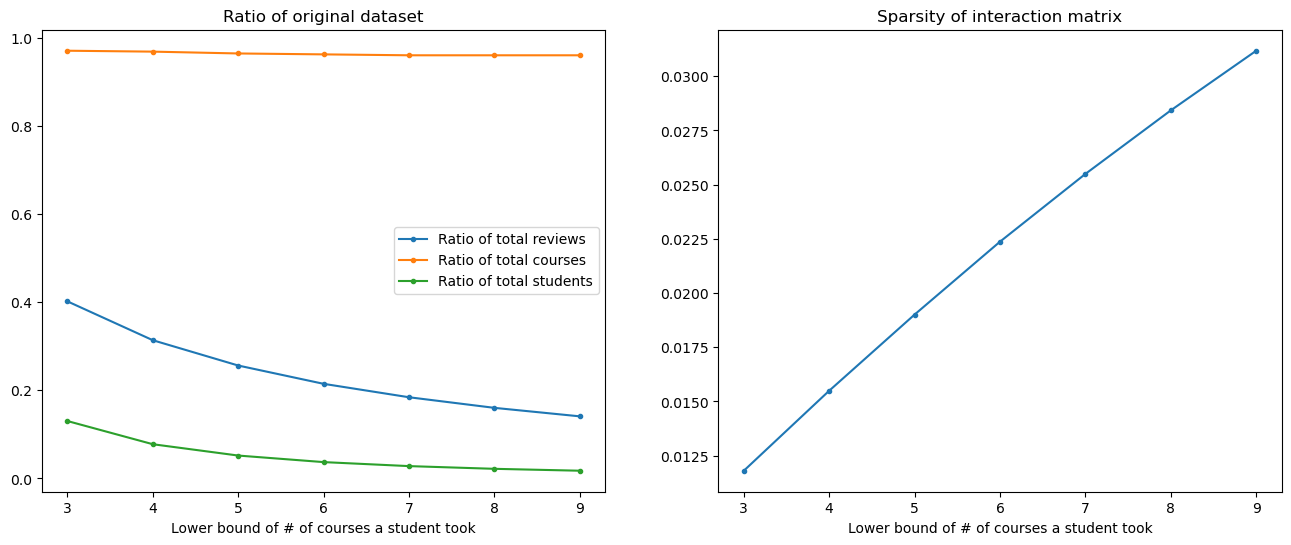

In [77]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].plot(x, results[:, 0], label='Ratio of total reviews', marker='.')
axs[0].plot(x, results[:, 1], label='Ratio of total courses', marker='.')
axs[0].plot(x, results[:, 2], label='Ratio of total students', marker='.')
axs[0].legend()
axs[0].set_xlabel('Lower bound of # of courses a student took')
axs[0].set_title('Ratio of original dataset')

axs[1].plot(x, results[:, 3], label='Sparsity', marker='.')
axs[1].set_xlabel('Lower bound of # of courses a student took')
axs[1].set_title('Sparsity of interaction matrix')

Text(0.5, 1.0, 'Sparsity of interaction matrix')

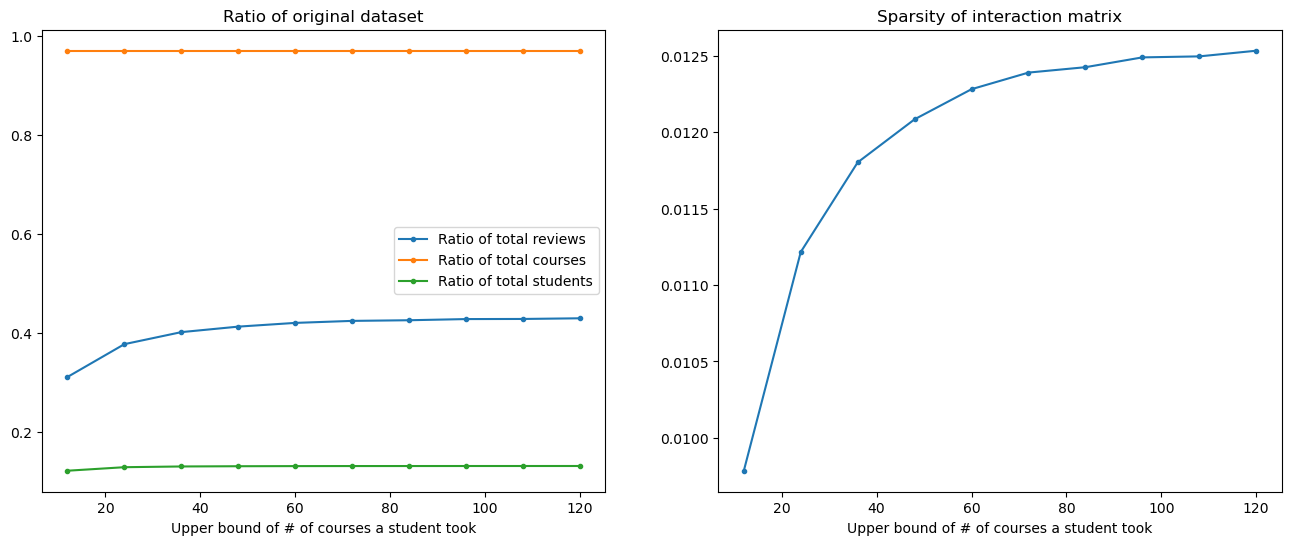

In [98]:
x = np.array([int(12 * i) for i in range(1, 11)])
results = np.array([sparsity(3, i) for i in x])

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].plot(x, results[:, 0], label='Ratio of total reviews', marker='.')
axs[0].plot(x, results[:, 1], label='Ratio of total courses', marker='.')
axs[0].plot(x, results[:, 2], label='Ratio of total students', marker='.')
axs[0].legend()
axs[0].set_xlabel('Upper bound of # of courses a student took')
axs[0].set_title('Ratio of original dataset')

axs[1].plot(x, results[:, 3], label='Sparsity', marker='.')
axs[1].set_xlabel('Upper bound of # of courses a student took')
axs[1].set_title('Sparsity of interaction matrix')

Takeaways:
* The upper bound doesn't matter as much for sparsity, but it could have an effect on dataset cleanliness (depending on how legit some of them look)
* The lower bound has a larger effect on sparsity. Depending on how we want to design the train-test split, we may settle for some value from 3 to 6.

## Finding an upper bound based on duplicate user-course pairs

In [85]:
student_set = df_students[df_students['courses'] <= 12]
review_set = df_reviews[df_reviews['reviewers'].isin(student_set.index)]
print(f"Dupes ratio: {100 - (100.0 * (len(review_set.drop_duplicates(['reviewers', 'course_id'])) / len(review_set))):.2f}%")

Dupes ratio: 0.84%


In [86]:
dupes = review_set.groupby(['reviewers', 'course_id'])[['reviews']].count()
dupes = dupes[dupes['reviews'] > 1].sort_values(by='reviews', ascending=False).reset_index()

In [87]:
dupe_reviews = dupes.merge(review_set, on=['reviewers', 'course_id'], how='inner')
dupe_reviews.head()

,reviewers,course_id,reviews_x,reviews_y,date_reviews,rating
0,By Rebecca H,the-science-of-well-being,6,I enjoyed the course. I have learned to look at my daily activities in a variety of ways!,"Apr 21, 2020",4
1,By Rebecca H,the-science-of-well-being,6,How often do we take time to study ourselves? This course provides the framework for just that - backed up by real science and an engaging lecturer. This is a course I would highly recommend to anyone looking to carve out space for themselves. It encourages you to take a meaningful look at yourself and your habits and finding opportunities to promote your own happiness.,"Aug 16, 2020",5
2,By Rebecca H,the-science-of-well-being,6,"This course has helped me find happiness in the little things again. I'd been feeling a bit down and self conscious, and now I'm able to stop, think, appreciate, admire life again. When I'd go on a hike, instead of thinking about what comes next, I'd focus on living in the now, and all the things around me to be grateful more. I highly recommend this course.","Jun 08, 2020",5
3,By Rebecca H,the-science-of-well-being,6,"Wonderful course! So insightful and really made me look at happiness differently and start putting into place practices to improve my wellbeing and happiness for the long term. I have already recommended the course to all my friends and family, can't speak highly enough of Laurie Santos, she's amazing! Thank you!","May 16, 2020",5
4,By Rebecca H,the-science-of-well-being,6,"Easy to follow, engaging and interesting. Great to put the science into practice and see the benefits.","May 22, 2020",5


In [93]:
def dupe_ratio(ub):
    student_set = df_students[df_students['courses'].between(3, ub)]
    review_set = df_reviews[df_reviews['reviewers'].isin(student_set.index)]
    return (1 - (len(review_set.drop_duplicates(['reviewers', 'course_id'])) / len(review_set)))

Text(0.5, 1.0, 'Duplicate review ratio')

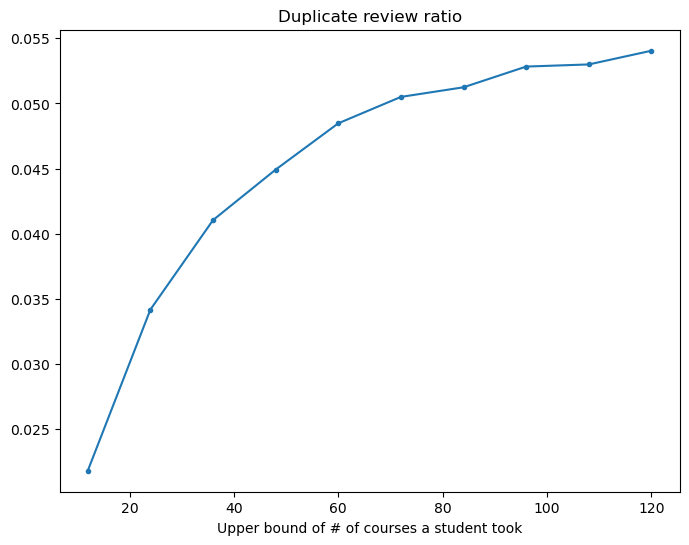

In [96]:
x = np.array([int(12 * i) for i in range(1, 11)])
results = np.array([dupe_ratio(i) for i in x])

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, results, label='Duplicate review ratio', marker='.')
ax.set_xlabel('Upper bound of # of courses a student took')
ax.set_title('Duplicate review ratio')

If we set the bounds to, say, 3 to 50 courses:
* Can still test people based off of 1 or 2 courses
* Only 4.5% dupes
* 1.2% sparsity

In [101]:
student_set = df_students[df_students['courses'].between(3, 50)]
total_students = len(df_students)
student_count = len(student_set)

review_set = df_reviews[df_reviews['reviewers'].isin(student_set.index)]
total_reviews = len(df_reviews)
review_count = len(review_set)

total_courses = len(df_courses_full)
courses_count = df_courses_full.index.isin(review_set['course_id']).sum()

sparsity = review_count / (student_count * courses_count)

print(f"{student_count} students, {courses_count} courses, {review_count} reviews")
print(f"Sparsity: {100*sparsity:.2f}%")

30719 students, 468 courses, 174219 reviews
Sparsity: 1.21%


## Plans for testing

* Train-test split by user (sequence split might be too short)
* Sequence prediction (i.e. predict the next course to take)
    * Since most sequence lengths are really short (< 5), we can assess for short methods
* Rating prediction
    * Regression problem